In [2]:
import pickle

def write_obj(obj,filename):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
        return b

book_data = load_obj("processed_arr2.pickle")

In [3]:
for book in book_data[0:5]:
    print book

{'streak': '12', 'owi': '435335', 'title': 'DESIREE', 'authors': ['Annemarie Selinko'], 'rank': '1', 'fast_subjects': set([u'D\xe9sir\xe9e, Queen, consort of Charles XIV John, King of Sweden and Norway, 1777-1860', 'Napoleon I, Emperor of the French, 1769-1821', 'English language', 'Relations with women']), 'year_pub': '1951', 'year': 1953, 'date': datetime.datetime(1953, 4, 19, 0, 0), 'genders': [{'gender': 'Female', 'viaf': '17229435', 'name': 'Annemarie Selinko'}]}
{'streak': '38', 'owi': '104466836', 'title': 'THE SILVER CHALICE', 'authors': ['Thomas B. Costain'], 'rank': '2', 'fast_subjects': set(['Historical fiction', 'Jesus Christ', 'Christian fiction', 'History of Biblical events', 'Grail', 'Bible.--New Testament', 'Last Supper']), 'year_pub': '1926', 'year': 1953, 'date': datetime.datetime(1953, 4, 19, 0, 0), 'genders': [{'gender': 'Male', 'viaf': '97749233', 'name': 'Thomas B. Costain'}]}
{'streak': '7', 'owi': '354027094', 'title': 'GOLDEN ADMIRAL', 'authors': ['Francis Van 

In [7]:
def is_book(x,book,fields):
    for f in fields:
        if x[f] != book[f]:
            return False
    return True

def find_book_in(book,ls,fields):
    for x in ls:
        if is_book(x,book,fields):
            return ls.index(x)
    return -1

def greater_than(book1,book2,f_to_max):
    try:
        f1 = int(book1[f_to_max])
        f2 = int(book2[f_to_max])
        if f_to_max == "rank":
            f1 = -f1
            f2 = -f2
        if f1>f2:
            return True
        else:
            return False
    except:
        return False

def get_unique_books_max(ls,u_fields,max_this):
    target =[]
    for book in ls:
        tar_index = find_book_in(book,target,u_fields)
        if tar_index>-1:
            tar_book = target[tar_index]
            if greater_than(book,tar_book,max_this):
                target[tar_index] = book
        else:
            target.append(book)
    return target
            


In [37]:
import random,pandas,matplotlib,re,math
%matplotlib inline

random.seed(0)
alph = re.compile('[^a-zA-Z]')
genre_terms = ["fiction","stories","tales","literature","opera"]
genre_dict = {"romance":{"keys":["romance","erotic"],"stops":["language"]}, #took out 'domestic'
              "domestic":{"keys":["domestic"]},
              "suspense":{"keys":["suspense"]},
              "legal":{"keys":["legal"]},
              "horror":{"keys":["horror","paranormal"]},
              "mystery":{"keys":["mystery","detective","crime"]},
              "spy_and_politics":{"keys":["spy ","politic"]},
              "fsf":{"keys":["fantasy","science fiction", "space","cyberpunk","steampunk"]},
              "adventure":{"keys":["adventure","western","sea "]},
              "ya":{"keys":["young adult"]},
              "war":{"keys":["war "]},
              "religious":{"keys":["religious","christian"],"stop":["aspects"]},
              "historical":{"keys":["historical"]} ## <-- I think this one might not be a well-supported
                                                   ## category in the DB
            }

def get_decade(year):
    frac = float(year)/10
    return int(math.floor(frac)*10)

def strip_punct(text):
    return alph.sub('', text)

def norm_text(text):
    return strip_punct(text).lower()

def genre_candidate(fast_term):
    for term in genre_terms:
        if term in norm_text(fast_term):
            return True
    return False

def is_genre(fast_term,genre_str):
    terms = genre_dict[genre_str]['keys']
    if 'stops' in genre_dict[genre_str]:
        stops=genre_dict[genre_str]['stops']
    else:
        stops = []
    target = False
    for term in terms:
        if term in fast_term.lower():
            target = True
    for stop in stops:
        if stop in fast_term.lower():
            target = False
    return target


def class_gender(gender_ls):
    if len(gender_ls) == 1:
        first_gen = gender_ls[0]['gender']
        if first_gen != '':
            return gender_ls[0]['gender']
        else:
            return 'NA'
    fem = 0
    male = 0
    for x in gender_ls:
        if x['gender'] == 'Female': ## THIS TREATS MIXED GENDER TEAMS AS FEMALE
            fem = fem+1
            male = male+1
        else:
            if x['gender'] == 'Male':
                male = male+1
    if fem+male == 0:
        return 'NA'
    ratio = float(fem)/float(fem+male)
    if ratio == 1:
        return 'Female'
    if ratio == 0:
        return 'Male'
    return 'Both'

def new_class_genre(subject_ls):
    target = []
    for sub in subject_ls:
        if genre_candidate(sub):
            for genre in genre_dict:
                if is_genre(sub,genre):
                    target.append(genre)
    if len(target) > 1:
        return random.choice(target)
    if len(subject_ls)>0:
        return "zz_no genre"
    else:
        return "zz_needs label"
        
def prep_dataframe(df):
    df = df.drop_duplicates(["title","year"])
    df.loc[:,"genre"] = df["fast_subjects"].apply(new_class_genre)
    df.loc[:,"gender"] = df["genders"].apply(class_gender)
    return df

In [8]:
max_ranks = get_unique_books_max(book_data,["title","authors"],"rank")

gender                Both    Female      Male        NA
rank                                                    
1       0.022942  0.018893  0.333333  0.607287  0.017544
2       0.021930  0.006579  0.368421  0.581140  0.021930
3       0.024283  0.011038  0.373068  0.560706  0.030905
4       0.022173  0.004435  0.354767  0.589800  0.028825
5       0.016216  0.008108  0.408108  0.540541  0.027027
6       0.024064  0.002674  0.342246  0.601604  0.029412
7       0.033592  0.007752  0.330749  0.594315  0.033592
8       0.032070  0.017493  0.376093  0.551020  0.023324
9       0.045584  0.014245  0.393162  0.529915  0.017094
10      0.030769  0.012308  0.403077  0.510769  0.043077
11      0.043956  0.007326  0.340659  0.589744  0.018315
12      0.037313  0.011194  0.395522  0.526119  0.029851
13      0.037801       NaN  0.350515  0.560137  0.051546
14      0.058333  0.016667  0.370833  0.529167  0.025000
15      0.115108  0.014388  0.244604  0.589928  0.035971
16      0.219512       NaN  0.2

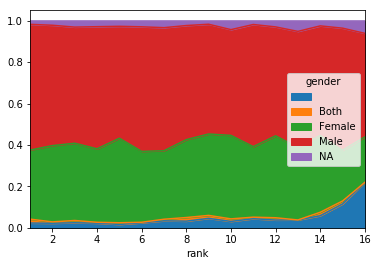

In [10]:
def count_to_percent(value,group,totals):
    s = totals.loc[group]["sum"]
    return float(value)/float(s)

rank_df = pandas.DataFrame(max_ranks)
ndf = prep_dataframe(rank_df)
ndf.loc[:,"rank"] = pandas.to_numeric(ndf["rank"], errors='coerce')
ndf = ndf[ndf["rank"]!=0]
ndf.loc[:,"decade"] = ndf.loc[:,"year"].apply(get_decade)
rank_gender = pandas.DataFrame({'count' : ndf.groupby( ["rank", "gender"] ).size()}).reset_index()

rank_totals = pandas.DataFrame({'sum' : ndf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]

rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
print rank_gender
rank_gender.plot(kind="area")


In [49]:
def graph_gender_ratio_rank(odf,dec):
    odf = pandas.concat([(odf[odf["gender"] == "Male"]), (odf[odf["gender"] == "Female"])])
    rank_gender = pandas.DataFrame({'count' : odf.groupby( ["rank", "gender"] ).size()}).reset_index()
    rank_totals = pandas.DataFrame({'sum' : odf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]
    rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
    rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
    ax = rank_gender.plot(kind = "area")
    ax.set_title(str(dec)+'s')
    return ax


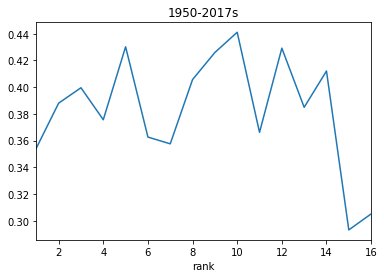

In [44]:
fig = graph_gender_ratio_rank(ndf,"1950-2017").get_figure()
#fig.savefig("proportion_of_women_by_rank.png")

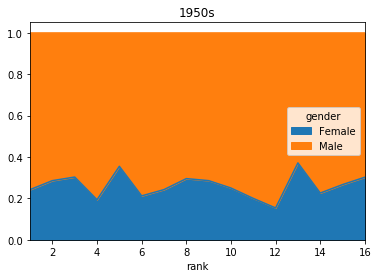

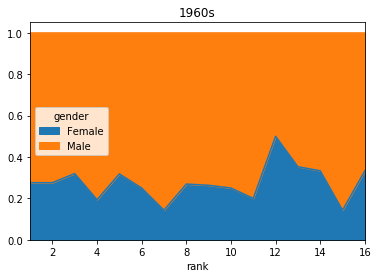

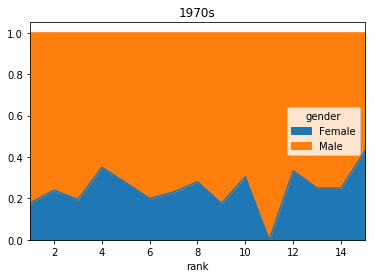

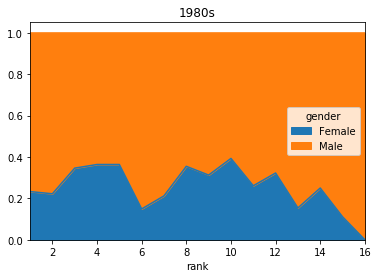

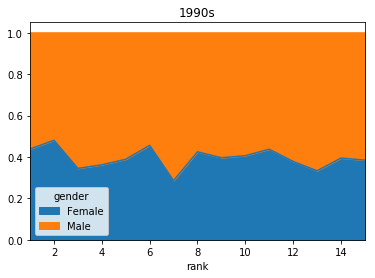

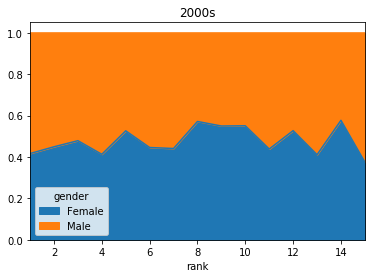

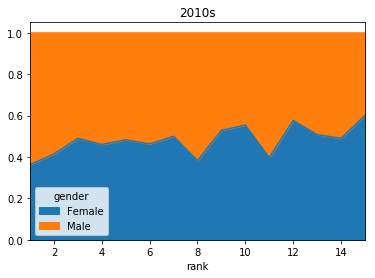

In [50]:
decades =[1950,1960,1970,1980,1990,2000,2010]
for decade in decades:
    #print decade 
    decade_frame = ndf[ndf["decade"]==decade]
    ax = graph_gender_ratio_rank(decade_frame,decade)

In [26]:
max_streaks = get_unique_books_max(book_data,["title","authors"],"streak")

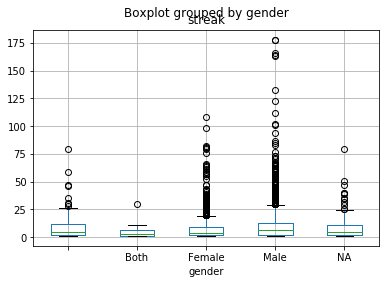

In [51]:
streak_df = pandas.DataFrame(max_streaks)
ndf = prep_dataframe(streak_df)
ndf.loc[:,"streak"] = pandas.to_numeric(ndf["streak"], errors='coerce')
fig = ndf.boxplot(column="streak",by="gender").get_figure()
fig.savefig("boxplot_streaks.png")
#ndf = ndf[ndf["streak"]>10]

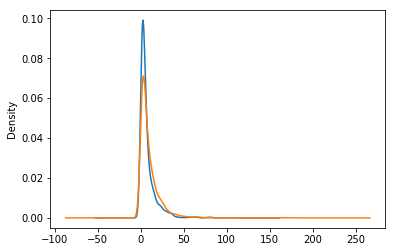

In [58]:
female = ndf[ndf["gender"]=="Female"]
male = ndf[ndf["gender"]=="Male"]
ax = female["streak"].plot.density()
fig = male["streak"].plot.density(ax=ax).get_figure()
fig.savefig("streak_density.png")

In [27]:
book_df = pandas.DataFrame(book_data)
book_df = prep_dataframe(book_df)
book_df.loc[:,"decade"] = book_df["year"].apply(get_decade)
#book_df = pandas.concat([(book_df[book_df["gender"]=="Male"]),(book_df[book_df["gender"]=="Female"])])
books_w_counts = pandas.DataFrame({'count' : book_df.groupby( ["decade", "genre", "gender"] ).size()}).reset_index()

ygenre_totals = pandas.DataFrame({'sum' : book_df.groupby(["decade", "genre"]).size()})
print pandas.DataFrame(ygenre_totals.loc[1980]).loc["adventure"]['sum']

def multilayer_ctp(value,group_fs,totals_ls):
    i = 0
    layer = totals_ls
    for x in group_fs:
        next_layer = layer.loc[x]
        if i < (len(group_fs)-1):
            layer = pandas.DataFrame(next_layer)
            i = i+1
        else:
            layer = next_layer
    s = layer['sum']
    return float(value)/float(s)


books_w_counts.loc[:,"percent"] = books_w_counts.apply(lambda x: multilayer_ctp(x['count'],[x['decade'],x['genre']],ygenre_totals), axis=1)
woman_counts = books_w_counts[books_w_counts["gender"]=="Female"]
woman_counts = woman_counts.pivot(index='decade', columns='genre', values='percent')
woman_counts

20


genre,adventure,domestic,fsf,historical,horror,legal,mystery,religious,romance,spy_and_politics,suspense,war,ya,zz_needs label,zz_no genre
decade,,,,,,,,,,,,,,,
1950,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.222222,1.000000,NaN,0.25,NaN,0.206522,0.233333
1960,0.250000,NaN,NaN,0.666667,NaN,NaN,0.777778,NaN,0.666667,0.285714,NaN,NaN,1.0,0.057143,0.236318
1970,NaN,0.333333,0.090909,0.400000,NaN,NaN,0.818182,1.000000,0.750000,0.090909,0.142857,0.50,NaN,0.095238,0.238095
1980,NaN,0.750000,0.116279,0.500000,0.050000,NaN,0.058824,NaN,0.857143,0.076923,NaN,NaN,NaN,0.170732,0.292857
1990,0.107143,1.000000,0.111111,0.600000,0.222222,0.285714,0.428571,0.666667,0.875000,NaN,0.125000,NaN,NaN,0.076923,0.376440
2000,0.076923,0.750000,0.161290,0.714286,0.437500,0.307692,0.214286,NaN,0.866667,NaN,0.086957,NaN,NaN,0.093750,0.467977
2010,NaN,NaN,0.333333,0.750000,0.666667,0.250000,NaN,NaN,0.833333,0.250000,0.062500,NaN,NaN,0.162791,0.428359


In [12]:
import numpy
type(numpy.nan)

float

In [35]:
ygenre_totals

sum
decade genre                 
1950   adventure            6
       domestic             1
       fsf                  2
       horror               1
       mystery              2
       religious            3
       romance              9
       spy_and_politics     1
       war                  4
       zz_needs label      92
       zz_no genre        690
1960   adventure            4
       domestic             1
       fsf                  1
       historical           3
       mystery              9
       romance              3
       spy_and_politics     7
       suspense             1
       war                  2
       ya                   1
       zz_needs label      35
       zz_no genre        402
1970   adventure            6
       domestic             3
       fsf                 11
       historical           5
       horror               1
       mystery             11
       religious            1
...                       ...
1990   zz_needs label      52
       zz_no genre        781
2000   adventure           13
       domestic             8
       fsf                 31
       historical           7
       horror              16
       legal               13
       mystery             28
       religious            4
       romance             15
       spy_and_politics    16
       suspense            23
       war                  3
       zz_needs label      64
       zz_no genre       1374
2010   adventure            2
       domestic             1
       fsf                  9
       historical           4
       horror               9
       legal                4
       mystery              9
       romance             12
       spy_and_politics     4
       suspense            16
       war                  1
       ya                   1
       zz_needs label      43
       zz_no genre       1347

[91 rows x 1 columns]

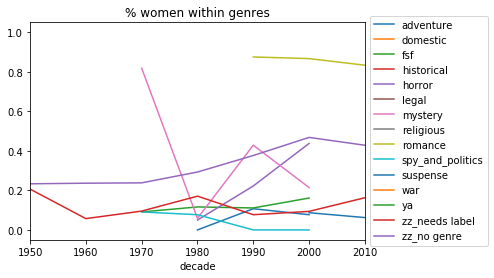

In [29]:
def not_enough_obs(y,g,tot_df,minimum):
    try:
        s = tot_df.loc[y].loc[g]["sum"]
        if s < minimum:
            return True
        else:
            return False
    except KeyError:
        return True
    
## Looks every entry up in the totals table, and if there are fewer
## than 10 observations, sets value to NaN
def filter_out_low_count(main_df,totals_df,min_obs):
    for year in main_df.index:
        genres = main_df.loc[year].index
        i = 0
        for percent in main_df.loc[year]:
            genre = genres[i]
            if not_enough_obs(year,genre,totals_df,min_obs):
                main_df.loc[year].loc[genre] = numpy.nan
            i = i+1

cleaning_woman = woman_counts.copy()
cleaning_woman = cleaning_woman.fillna(0)
filter_out_low_count(cleaning_woman,ygenre_totals,10)
cleaning_woman
ax = cleaning_woman.plot()
matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title("% women within genres")
fig = ax.get_figure()
fig.savefig("percent_women_in_each_genre.png")

In [15]:
cleaning_woman

genre,adventure,domestic,fsf,historical,horror,legal,mystery,religious,romance,spy_and_politics,suspense,war,ya,zz_needs label,zz_no genre
decade,,,,,,,,,,,,,,,
1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206522,0.233333
1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057143,0.236318
1970.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.866667,NaN,NaN,NaN,NaN,NaN,NaN,0.095238,0.238095
1980.0,0.000000,NaN,0.116279,NaN,0.045455,NaN,0.100000,NaN,NaN,0.0,NaN,NaN,NaN,0.170732,0.292857
1990.0,0.095238,1.0,0.100000,0.6,0.222222,0.1,0.454545,NaN,0.846154,0.0,NaN,NaN,NaN,0.076923,0.376440
2000.0,0.100000,NaN,0.161290,NaN,0.470588,NaN,0.120000,NaN,0.937500,0.0,0.230769,NaN,NaN,0.093750,0.467977
2010.0,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.162791,0.428359


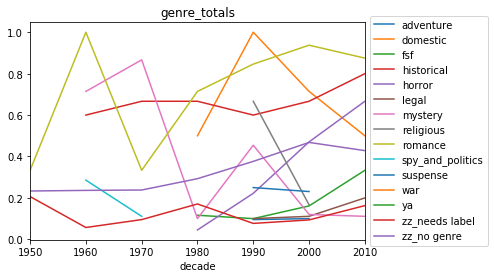

In [18]:
ax = woman_counts.plot()
ax.set_title("genre_totals")
matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig = ax.get_figure()

In [32]:
print df_to_json(cleaning_woman)

<type 'dict'>
[{'values': [[631180800, 0.4285714286], [315561600, 0.0588235294], [-315590400, None], [28800, 0.8181818182], [946713600, 0.2142857143], [-631123200, None], [1262332800, None]], 'key': u'mystery'}, {'values': [[631180800, 0.3764404609], [315561600, 0.2928571429], [-315590400, 0.236318408], [28800, 0.2380952381], [946713600, 0.4679767103], [-631123200, 0.2333333333], [1262332800, 0.428359317]], 'key': u'zz_no genre'}, {'values': [[631180800, 0.0769230769], [315561600, 0.1707317073], [-315590400, 0.0571428571], [28800, 0.0952380952], [946713600, 0.09375], [-631123200, 0.2065217391], [1262332800, 0.1627906977]], 'key': u'zz_needs label'}, {'values': [[631180800, 0.1111111111], [315561600, 0.1162790698], [-315590400, None], [28800, 0.0909090909], [946713600, 0.1612903226], [-631123200, None], [1262332800, None]], 'key': u'fsf'}, {'values': [[631180800, None], [315561600, None], [-315590400, None], [28800, None], [946713600, None], [-631123200, None], [1262332800, None]], 'key

In [31]:
import time
import json
from datetime import datetime

def time_from_y(y):
    dt = datetime(year=int(y), month=1, day=1)
    tt = time.mktime(dt.timetuple())
    return int(tt)

def df_to_json(dataframe):
    j = dataframe.to_json()
    j = json.loads(j)
    print type(j)
    k = []
    for x in j:
        target = {}
        target["key"] = x
        v = []
        for y in j[x]:
            timey = time_from_y(y)
            value = j[x][y]
            point = [timey,value]
            v.append(point)
        target["values"] = v
        k.append(target)
    return k

In [42]:
book_df = pandas.DataFrame(book_data)
book_df = prep_dataframe(book_df)
#book_df.loc[:,"decade"] = book_df["year"].apply(get_decade)
book_df = pandas.concat([(book_df[book_df["gender"]=="Male"]),(book_df[book_df["gender"]=="Female"])])
books_w_counts = pandas.DataFrame({'count' : book_df.groupby( ["year", "genre", "gender"] ).size()}).reset_index()

ygenre_totals = pandas.DataFrame({'sum' : book_df.groupby(["year", "genre"]).size()})
print pandas.DataFrame(ygenre_totals.loc[1980]).loc["adventure"]['sum']

books_w_counts.loc[:,"percent"] = books_w_counts.apply(lambda x: multilayer_ctp(x['count'],[x['year'],x['genre']],ygenre_totals), axis=1)
woman_counts = books_w_counts[books_w_counts["gender"]=="Female"]
woman_counts = woman_counts.pivot(index='year', columns='genre', values='percent')
woman_counts

3


genre,adventure,domestic,fsf,historical,horror,legal,mystery,religious,romance,spy_and_politics,suspense,war,ya,zz_needs label,zz_no genre
year,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272727,0.271186
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.243243
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166667,0.323529
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,1.000000,NaN,NaN,0.200000,0.222222
1954,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.254237
1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.225806
1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285714,0.274194
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,0.250000,0.293103
1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,0.500000,0.269841


In [21]:
ygenre_totals.loc[1960].loc["adventure"].loc["sum"]

3

In [137]:
ygenre_totals.to_csv("genre_totals_per_year.csv")
woman_counts.to_csv("percent_women_by_genre.csv")

gender  Both  Female   Male    NA
year                             
1950     NaN    19.0   52.0   9.0
1951     NaN    21.0   63.0  12.0
1952     NaN    23.0   53.0  11.0
1953     NaN    15.0   49.0  11.0
1954     NaN    17.0   48.0   9.0
1955     NaN    18.0   51.0  11.0
1956     NaN    19.0   52.0   8.0
1957     NaN    20.0   52.0  12.0
1958     NaN    20.0   52.0   7.0
1959     NaN    14.0   54.0   9.0
1960     NaN    18.0   53.0   4.0
1961     NaN    20.0   42.0   9.0
1962     1.0    14.0   47.0   6.0
1963     NaN     9.0   21.0   4.0
1964     NaN     6.0   24.0   7.0
1965     NaN     8.0   23.0   4.0
1966     NaN    12.0   22.0   NaN
1967     NaN     6.0   28.0   4.0
1968     NaN     6.0   25.0   3.0
1969     NaN    13.0   26.0   4.0
1970     NaN    13.0   23.0   1.0
1971     NaN    11.0   33.0   2.0
1972     NaN     8.0   30.0   1.0
1973     NaN    12.0   27.0   1.0
1974     NaN     9.0   33.0   1.0
1975     NaN     5.0   29.0   2.0
1976     NaN     9.0   31.0   3.0
1977     NaN  

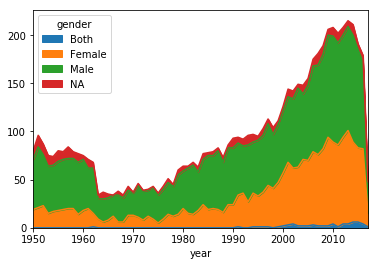

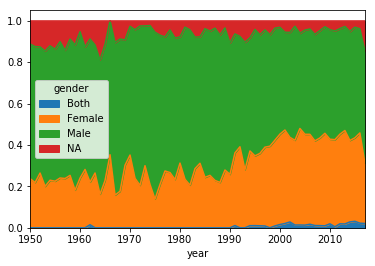

In [40]:
def count_to_percent(value,group,totals):
    s = totals.loc[group]["sum"]
    return float(value)/float(s)

ndf = pandas.DataFrame(book_data)
ndf = prep_dataframe(ndf)
gender_df = pandas.DataFrame({'count' : ndf.groupby( ["year", "gender"] ).size()}).reset_index()

year_totals = pandas.DataFrame({'sum' : ndf.groupby("year").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]

gender_df.loc[:,"percent"] = gender_df.apply(lambda x: count_to_percent(x['count'], x['year'],year_totals), axis=1)
count_gender_df = gender_df.pivot(index='year', columns='gender', values='count')
print count_gender_df
count_gender_df.plot(kind="area")
perc_gender_df = gender_df.pivot(index='year', columns='gender', values='percent')
print perc_gender_df
perc_gender_df.plot(kind="area")


In [41]:
print df_to_json(count_gender_df)

<type 'dict'>
[{'values': [[1041408000, 2.0], [852105600, 1.0], [568022400, None], [599644800, None], [504950400, None], [536486400, None], [441792000, None], [473414400, None], [-63129600, None], [-31507200, None], [315561600, None], [347184000, None], [-189360000, None], [-157737600, None], [-126201600, None], [-94665600, None], [-315590400, None], [-283968000, None], [-252432000, 1.0], [-220896000, None], [820483200, 1.0], [1388563200, 6.0], [1483257600, 1.0], [1451635200, 4.0], [1293868800, 1.0], [1262332800, 4.0], [1357027200, 4.0], [1325404800, 4.0], [1420099200, 6.0], [1104566400, 2.0], [-473356800, None], [-504892800, None], [-410198400, None], [-441820800, None], [-599587200, None], [-631123200, None], [-536428800, None], [-568051200, None], [378720000, None], [-347126400, None], [-378662400, None], [410256000, None], [662716800, 1.0], [631180800, None], [725875200, None], [694252800, None], [788947200, 1.0], [757411200, 1.0], [284025600, None], [252489600, None], [220953600, 

In [ ]:
print df_to_json(perc_gender_df)